In [114]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show
import statsmodels
import scipy
import plotly.express as px
import plotly.graph_objects as go
import dash
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs

import country_converter as coco

In [2]:
pd.set_option('display.max_columns', 100)
%matplotlib inline
sns.set_style()
pd.set_option('display.max_columns', 1000)
plt.rcParams["figure.figsize"] = (15,8)
# rc = {
#     # "axes.facecolor": "#FFF9ED",
#     "axes.edgecolor": "#000000",
#     "grid.color": "#EBEBE7",
#     "axes.labelcolor": "#000000",
#     "xtick.color": "#000000",
#     "ytick.color": "#000000",
#     "grid.alpha": 0.4,
    
# }
plt.style.use('fivethirtyeight')
sns.despine()

<Figure size 1500x800 with 0 Axes>

# Importing Data

In [3]:
path = gplt.datasets.get_path('world')
world = gpd.read_file(path)

In [4]:
!kaggle datasets download -d nelgiriyewithana/billionaires-statistics-dataset 
import zipfile
with zipfile.ZipFile('billionaires-statistics-dataset.zip', 'r') as zip_ref:
  zip_ref.extractall()

Traceback (most recent call last):
  File "/home/bach/anaconda3/envs/dataviz/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/home/bach/anaconda3/envs/dataviz/lib/python3.8/site-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/home/bach/anaconda3/envs/dataviz/lib/python3.8/site-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /home/bach/.kaggle. Or use the environment method.


In [5]:
data = pd.read_csv('Billionaires Statistics Dataset.csv')
data.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,organization,selfMade,status,gender,birthDate,lastName,firstName,title,date,state,residenceStateRegion,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,LVMH Moët Hennessy Louis Vuitton,False,U,M,3/5/1949 0:00,Arnault,Bernard,Chairman and CEO,4/4/2023 5:01,NaN,NaN,1949.0,3.0,5.0,110.05,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,Tesla,True,D,M,6/28/1971 0:00,Musk,Elon,CEO,4/4/2023 5:01,Texas,South,1971.0,6.0,28.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,Amazon,True,D,M,1/12/1964 0:00,Bezos,Jeff,Chairman and Founder,4/4/2023 5:01,Washington,West,1964.0,1.0,12.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,Oracle,True,U,M,8/17/1944 0:00,Ellison,Larry,CTO and Founder,4/4/2023 5:01,Hawaii,West,1944.0,8.0,17.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,Berkshire Hathaway Inc. (Cl A),True,D,M,8/30/1930 0:00,Buffett,Warren,CEO,4/4/2023 5:01,Nebraska,Midwest,1930.0,8.0,30.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


# EDA

## Billionaires per Countries

### Overall count

In [6]:
countryCount = data.groupby('countryOfCitizenship')['rank'].count()
countryCount = countryCount.reset_index().sort_values('rank', ascending=False)

Text(0.5, 0, 'Number of billionaires')

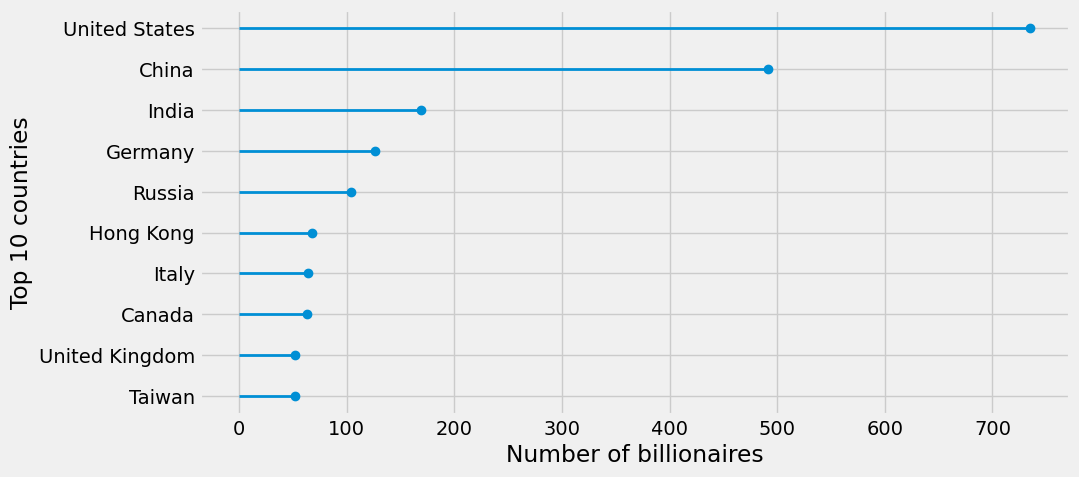

In [7]:
top10 =  countryCount.head(10)
my_range = range(len(top10.index)+1, 1, -1)


fig, ax = plt.subplots(figsize=(10,5))

plt.hlines(y=my_range, xmin=0, xmax=top10['rank'], linewidth=2.0)
plt.plot(top10['rank'], my_range, 'o')

plt.yticks(my_range, top10['countryOfCitizenship'])
plt.ylabel('Top 10 countries')
plt.xlabel('Number of billionaires')

In [117]:
countryCount['id'] = coco.convert(names=countryCount['countryOfCitizenship'].tolist(), to='ISO3')

Text(0.5, 1.0, 'Number of billionaires around the world')

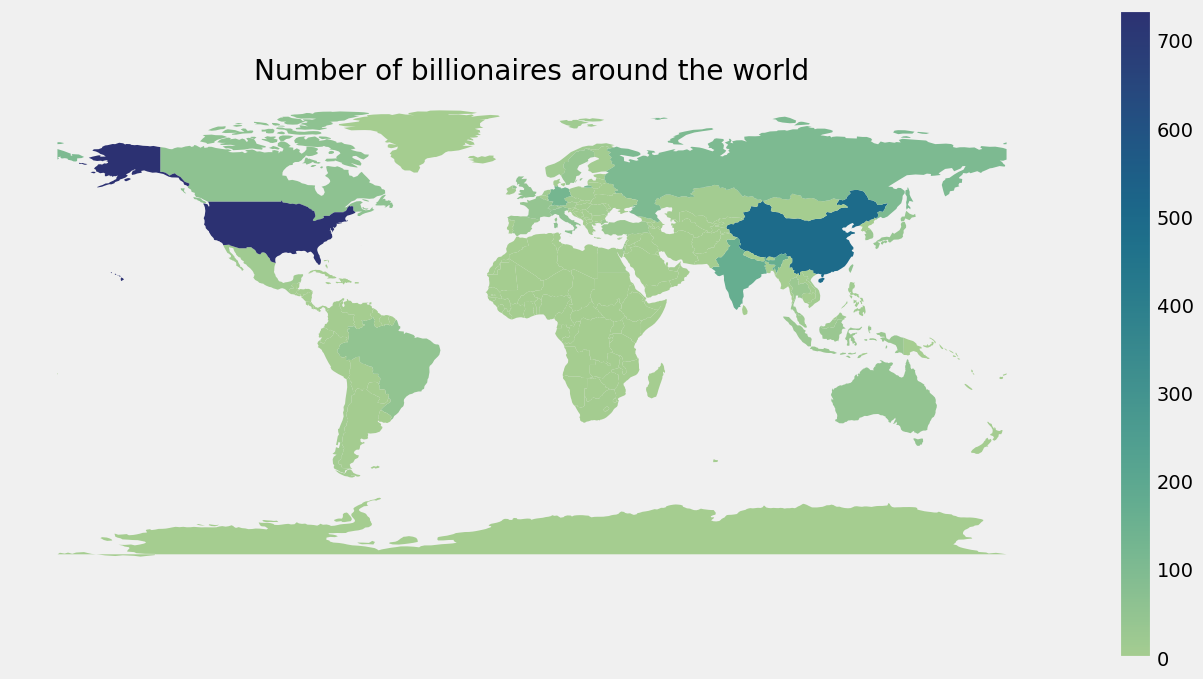

In [121]:
temp = world.merge(countryCount, left_on='id', right_on='id', how='left')
temp['rank'] = temp['rank'].fillna(0)
palette = sns.color_palette('crest', as_cmap=True)


ax = temp.plot(column='rank', legend=True, cmap=palette)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Number of billionaires around the world')

### Per capita

World population dataset obtained from https://www.imf.org/external/datamapper/LP@WEO/OEMDC/ADVEC/WEOWORLD

In [125]:
!kaggle datasets download -d iamsouravbanerjee/world-population-dataset
with zipfile.ZipFile('world-population-dataset.zip', 'r') as zip_ref:
  zip_ref.extractall()

  0%|                                               | 0.00/15.7k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 15.7k/15.7k [00:00<00:00, 13.4MB/s]


In [127]:
pop = pd.read_csv('world_population.csv')
pop

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25


## Billionaires by Gender

In [8]:
genderCount = data.groupby('gender')['rank'].count()
genderCount = genderCount.reset_index().sort_values('rank', ascending=False)

In [9]:
ratio = genderCount.loc[1, "rank"]/genderCount.loc[0, "rank"]

Text(0.5, 0, 'Number of billionaire by gender')

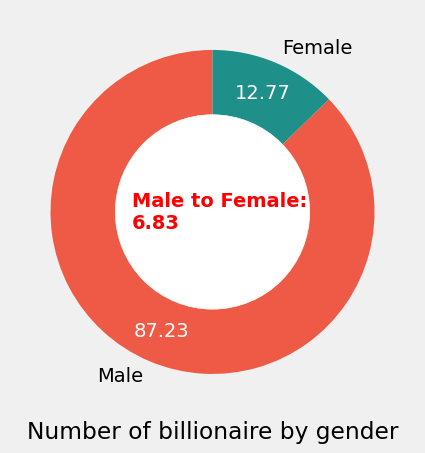

In [32]:
fig, ax = plt.subplots(figsize=(8,5))
colors = ['#EE5A45', '#1E8F89']
# sns.set_palette(palette=colors)
_, _, auto_text = plt.pie(genderCount['rank'], labels=['Male', 'Female'], colors=colors, autopct='%.2f', 
        pctdistance=0.8, startangle=90)
for text in auto_text:
  text.set_color('white')
my_circle=plt.Circle((0,0), 0.6, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
ax.text(-0.5, -0.1, f'Male to Female: \n{ratio:.2f}', color='red', fontweight='heavy')
plt.xlabel('Number of billionaire by gender')
# plt.xticks([0, 1], ['Male', 'Female'])

## Billionaires by self made status

In [11]:
originCount = data.groupby('selfMade')['rank'].count()
originCount = originCount.reset_index().sort_values('rank', ascending=False)

Text(0.5, 0, 'Origin')

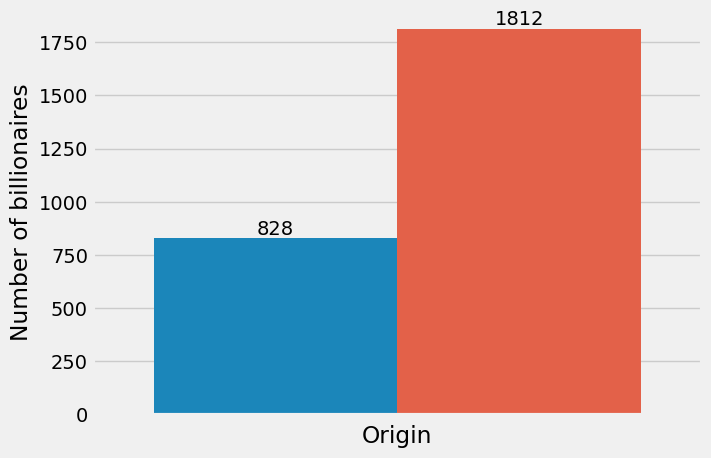

In [30]:
fig, axes = plt.subplots(figsize=(7,5))

colors = []

ax = sns.barplot(data=originCount, hue='selfMade', y='rank')
for container in ax.containers:
  ax.bar_label(container)

axes.legend().remove()
plt.ylabel('Number of billionaires')
plt.xlabel('Origin')

## Billionaires by age

Text(0, 0.5, 'Number of billionaires')

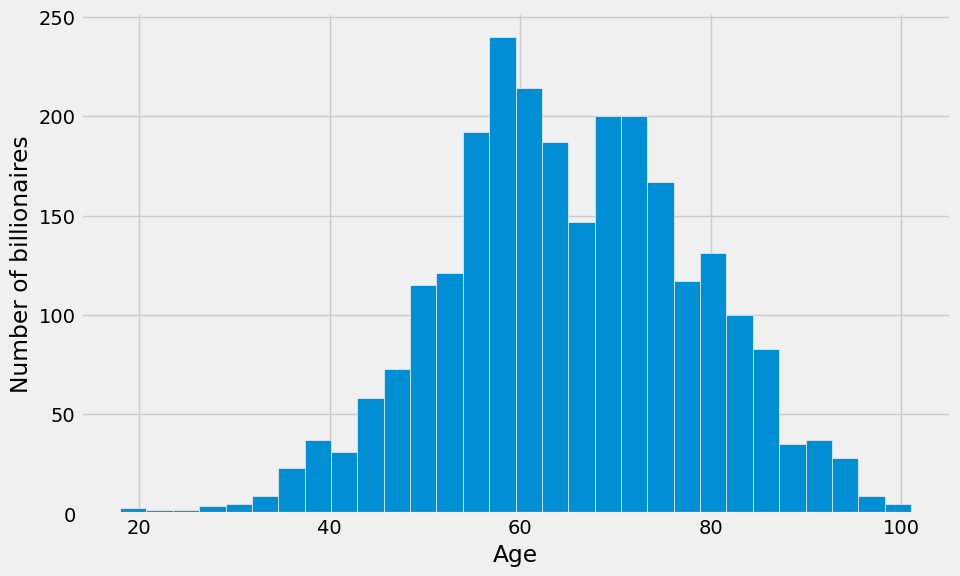

In [35]:
fig, axes = plt.subplots(figsize=(10, 6.18))
ax = sns.histplot(data=data, x='age', alpha=1)
ax.set_xlabel('Age')
ax.set_ylabel('Number of billionaires')

In [14]:
data.loc[data['age']==min(data['age'])]

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,organization,selfMade,status,gender,birthDate,lastName,firstName,title,date,state,residenceStateRegion,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
823,818,3500,Fashion & Retail,Clemente Del Vecchio,18.0,Italy,Milan,Eyeglases,Fashion & Retail,Italy,NaN,False,N,M,5/6/2004 0:00,Del Vecchio,Clemente,NaN,4/4/2023 5:01,NaN,NaN,2004.0,5.0,6.0,110.62,0.6,"$2,001,244,392,042",61.9,101.9,82.9,24.3,59.1,60297396.0,41.87194,12.56738


In [15]:
data.loc[data['age']==max(data['age'])]

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,organization,selfMade,status,gender,birthDate,lastName,firstName,title,date,state,residenceStateRegion,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
2180,2133,1300,Finance & Investments,George Joseph,101.0,United States,Los Angeles,Insurance,Finance & Investments,United States,NaN,True,D,M,9/11/1921 0:00,Joseph,George,NaN,4/4/2023 5:01,California,West,1921.0,9.0,11.0,117.24,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.09024,-95.712891


Text(2.1, 510, 'A lot of birth in \nJanuary')

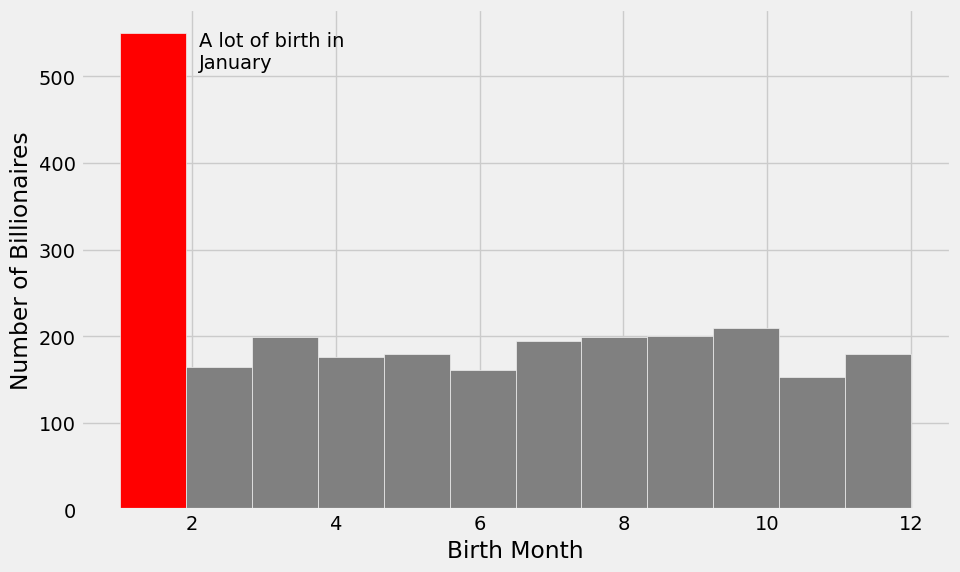

In [47]:
fig, axes = plt.subplots(figsize=(10, 6.18))
# color = ['orange' orange if 
ax = sns.histplot(data=data, x='birthMonth', bins=12, color='grey', alpha=1)
ax.patches[0].set_facecolor('red')
ax.set_xlabel('Birth Month')
ax.set_ylabel('Number of Billionaires')
ax.text(2.1, 510, 'A lot of birth in \nJanuary')

Text(3, 625, 'A disproportionate amount \n of birth on the first day')

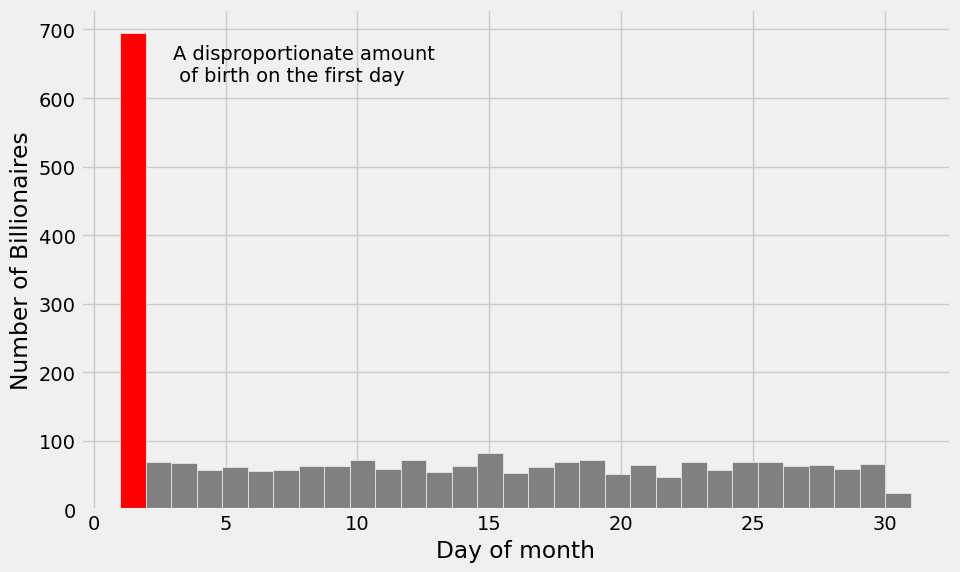

In [41]:
fig, axes = plt.subplots(figsize=(10, 6.18))
# color = ['orange' orange if 
ax = sns.histplot(data=data, x='birthDay', bins=31, color='grey', alpha=1)
ax.patches[0].set_facecolor('red')
plt.ylabel('Number of Billionaires')
plt.xlabel('Day of month')
plt.text(3, 625, 'A disproportionate amount \n of birth on the first day')

This is due to missing data, which the creator of the dataset filled in as January 1st

## Billionaires by industry

In [51]:
industryCount = data.groupby('category')['rank'].count()
industryCount = industryCount.reset_index().sort_values('rank', ascending=False)

Text(250, 10, '3 main industry \n groups')

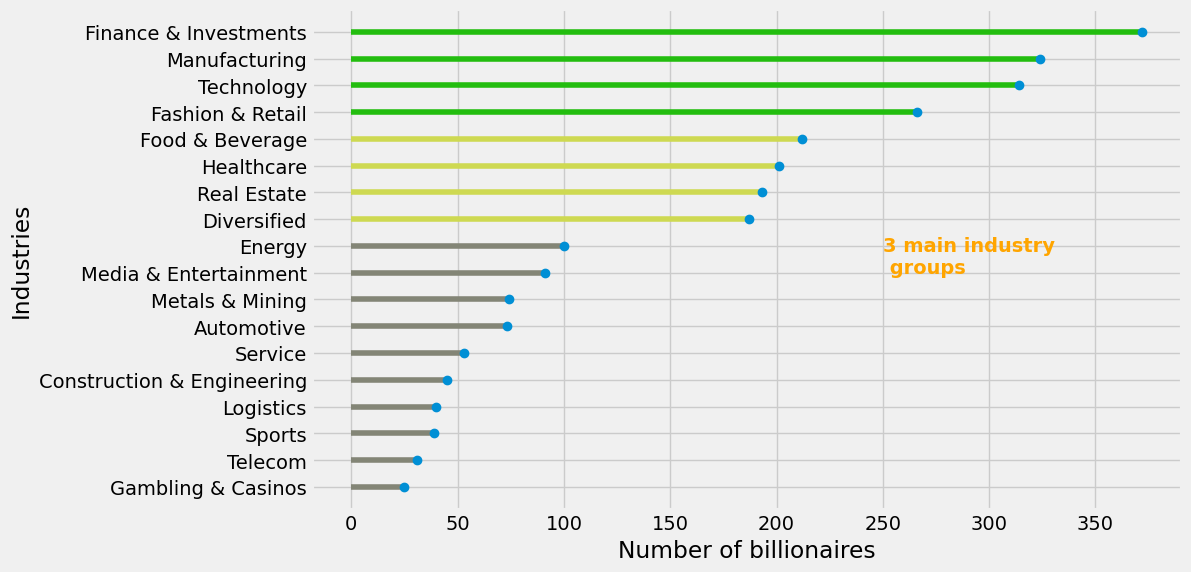

In [82]:
from matplotlib.patches import Rectangle
my_range = range(len(industryCount.index)+1, 1, -1)



fig, ax = plt.subplots(figsize=(10, 6.18))

palette = ['#23bd0f', '#ced952', '#838576']
colors = [palette[0] if i > 15 else palette[1] if i > 11 else palette[2] for i in my_range]

plt.hlines(y=my_range, xmin=0, xmax=industryCount['rank'], linewidth=4.0, colors=colors)
plt.plot(top10['rank'], my_range, 'o')

plt.yticks(my_range, industryCount['category'])
plt.ylabel('Industries')
plt.xlabel('Number of billionaires')
plt.text(250, 10, '3 main industry \n groups', color='orange', fontweight='heavy')